In [1]:
import os
import import_ipynb
from RAH import show_results_hypothesis
from RAH import check_partion

import pandas as pd
from numpy import *
import numpy as np 
import networkx as nx 


In [2]:
# This wil get us the similarity matrix W given the graph and the number of vertices n.
# the vertices are number form 0 to n - 1.
def get_matrix2(graph, n):
    
    w = np.zeros((n, n))
   
    for x in graph.keys() :
        for y in graph[x]:
            w[x][y] = 1
            w[y][x] = 1

    return w
    

In [3]:
Results_ncut = pd.DataFrame(index = ['SLS','SLP', 'SLH', 'UnS','UnP', 'UnH','RwS','RwP', 'RwH'])
Results_conductance = pd.DataFrame(index = ['SLS','SLP', 'SLH', 'UnS','UnP', 'UnH','RwS','RwP', 'RwH'])

graph_number = 0
graphs = {}
FN = -1

In [4]:
def add_result_row(graph):
    
    Results_ncut[graph[0]], Results_conductance[graph[0]] = show_results_hypothesis(graph[1])

In [5]:
FN = -1

In [6]:
path = "Random Graph Data/"
dirs = os.listdir(path)

for filenumber in range(len(dirs)):
    if filenumber <= FN:
        continue
    
    name = 'Random Graph Data/' + dirs[filenumber]
    if(dirs[filenumber][0] != 'r'):
        continue
    print(filenumber)
    data = np.load(name)
    M = data['arr_0']
    
    n = np.size(M, axis = 1)
    
    if check_partion(M, n):
        continue
    Graph = ['g' + str(graph_number), M]
    graphs[graph_number] = M
    graph_number += 1
    add_result_row(Graph)
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
27

In [7]:
RL_Ncut = Results_ncut.T

In [8]:
y_SLH = RL_Ncut['SLH'].values
y_UnH = RL_Ncut['UnH'].values
y_RwH = RL_Ncut['RwH'].values
y_SLP = RL_Ncut['SLP'].values
y_UnP = RL_Ncut['UnP'].values
y_RwP = RL_Ncut['RwP'].values
y_SLS = RL_Ncut['SLS'].values
y_UnS = RL_Ncut['UnS'].values
y_RwS = RL_Ncut['RwS'].values

In [9]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure

x = range(0,graph_number) 
#plt.plot(x, y_UnP, color ='r', label ='UnP') 
plt.plot(x, y_RwH, color ='b', label ='RwH') 
#plt.plot(x, y_SLP, color ='g', label ='SLP') 
#plt.plot(x, y_UnS, color ='y', label ='UnS') 

plt.plot(x, y_RwS, color ='c', label ='RwS') 
#plt.plot(x, y_SLS, color ='m', label ='SLS') 

plt.xlabel('x - axis') 
plt.ylabel('y - axis') 

plt.title("Ncut")
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = [20,9]
plt.show() 

<Figure size 640x480 with 1 Axes>

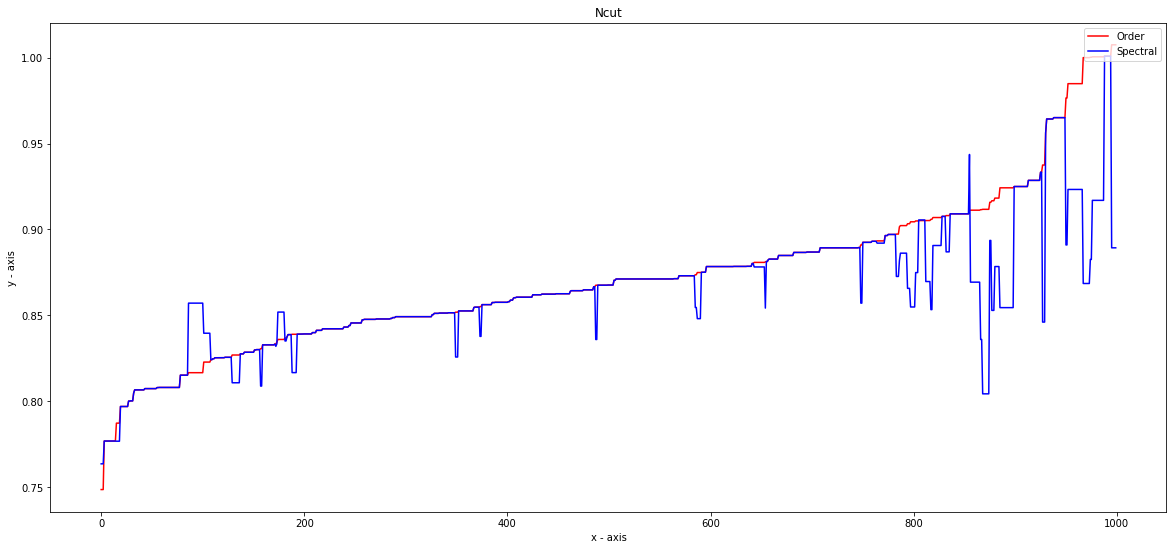

In [23]:
y_P = np.fmin(y_SLP, y_RwP, y_UnP)
y_S = np.fmin(y_SLS, y_UnS, y_RwS)
y_H = np.fmin(y_SLH, y_UnH, y_RwH)
index = np.argsort(y_RwH)
x = range(0,graph_number) 
plt.plot(x, y_RwH[index], color ='r', label ='Order') 
plt.plot(x, y_RwS[index], color ='b', label ='Spectral') 



plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.title("Ncut")
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = [20,9]
plt.show() 

In [27]:
#print(np.sum(y_P))
print(np.sum(y_RwS))
print(np.sum(y_RwH))

864.1534057304887
872.0442786045267


In [12]:
AM = np.array([[0, 1, 0, 1, 1],
 [1, 0, 1, 1, 1],
 [0, 1, 0, 1, 1],
 [1, 1, 1, 0, 1],
 [1, 1, 1, 1, 0]])
print(AM)

[[0 1 0 1 1]
 [1 0 1 1 1]
 [0 1 0 1 1]
 [1 1 1 0 1]
 [1 1 1 1 0]]


Graph = ['g' + str(graph_number), AM]
graphs[graph_number] = AM
graph_number += 1
add_result_row(Graph)

In [13]:
AM = np.array([[0, 1, 1, 0, 0, 1],
 [1, 0, 0, 1, 1, 0],
 [1, 0, 0, 0, 1, 1],
 [0, 1, 0, 0, 0, 0],
 [0, 1, 1, 0, 0, 0],
 [1, 0, 1, 0, 0, 0]])

graph_number += 1
Graph = ['g' + str(graph_number), AM]
graphs[graph_number] = AM

add_result_row(Graph)

In [14]:
AM = graphs[5]

In [15]:
print(np.array(AM))

[[0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1.]
 [1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1.]
 [1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1.]
 [1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1.]
 [0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0.]]


In [16]:
def show_graph_with_labels(adjacency_matrix):
    G = nx.from_numpy_matrix(adjacency_matrix) 
    nx.draw(G, with_labels=True)


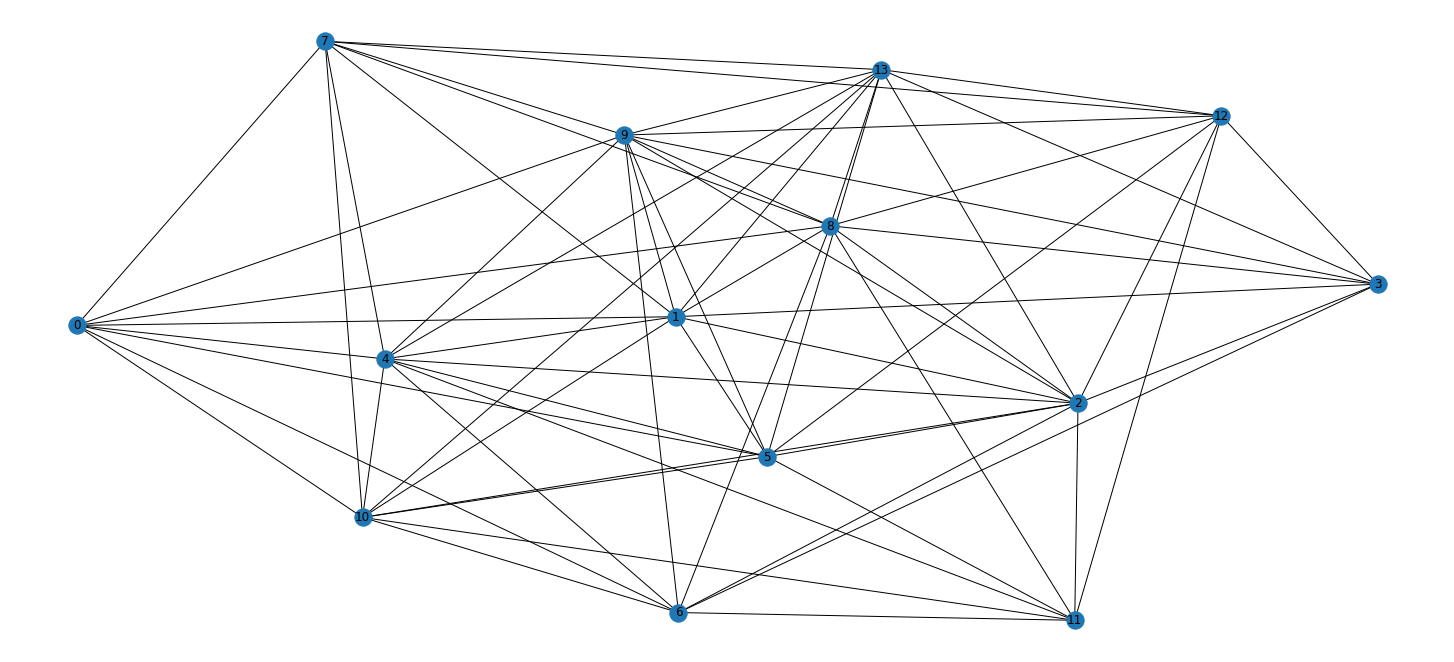

In [17]:
show_graph_with_labels(AM)

ValueError: x and y must have same first dimension, but have shapes (999,) and (1000,)

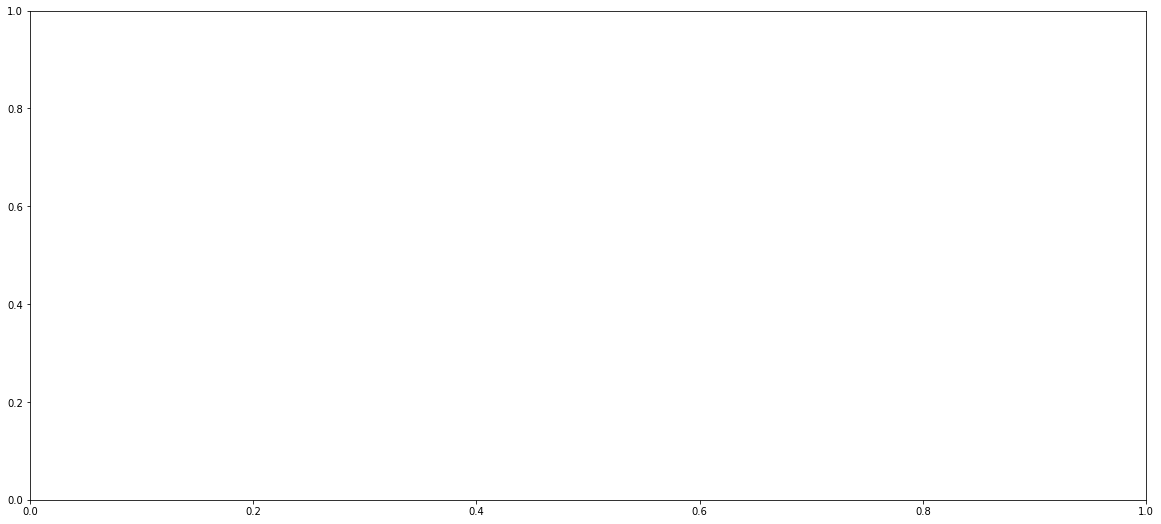

In [18]:
y_SLP = RL_Ncut['SLP'].values
y_UnP = RL_Ncut['UnP'].values
y_RwP = RL_Ncut['RwP'].values
y_SLS = RL_Ncut['SLS'].values
y_UnS = RL_Ncut['UnS'].values
y_RwS = RL_Ncut['RwS'].values

x = range(0, graph_number - 1) 
plt.plot(x, y_UnP, color ='r', label ='UnP') 
#plt.plot(x, y_RwP, color ='b', label ='RwP') 
#plt.plot(x, y_SLP, color ='g', label ='SLP') 
plt.plot(x, y_UnS, color ='y', label ='UnS') 

#plt.plot(x, y_RwS, color ='c', label ='RwS') 
#plt.plot(x, y_SLS, color ='m', label ='SLS') 

plt.xlabel('x - axis') 
plt.ylabel('y - axis') 

plt.title("Ncut")
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = [20,9]
plt.show() 

'''y_P = np.fmin(y_SLP, y_RwP, y_UnP)
y_S = np.fmin(y_SLS, y_UnS, y_RwS)

x = range(0,graph_number) 
plt.plot(x, y_S, color ='b', label ='Spectral') 
plt.plot(x, y_UnP, color ='r', label ='Proposed') 


plt.xlabel('x - axis') 
plt.ylabel('y - axis') 
plt.title("Ncut")
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = [20,9]
plt.show() '''

In [ ]:
Results_ncut

In [ ]:
from RAH import get_fielder
from RAH import get_symmetric_laplacian

In [ ]:
n = np.size(AM, axis = 1)
get_fielder(get_symmetric_laplacian(AM), n)

Enneahedron_1 = ['Enneahedron_1',[[{0 : [1, 3, 4],
         1 : [0, 2, 4, 6, 5],
         2 : [1, 3, 5],
         3 : [0, 4, 7, 5, 2],
         4 : [0, 1, 3, 6],
         5 : [1, 7, 3, 2],
         6 : [1, 3, 4, 7],
         7 : [6, 5],
             }],
        [8]]]
graphs[graph_number] = get_matrix2(Enneahedron_1[1][0][0],Enneahedron_1[1][1][0])
add_result_row([Enneahedron_1[0], graphs[graph_number]])
graph_number += 1

Petersen = ['Petersen', [[{0 : [2, 3],
         1 : [4, 3],
         2 : [0, 4],
         3 : [0, 1],
         4 : [1, 2],
         5 : [6, 0],
         6 : [7, 1],
         7 : [8, 2],
         8 : [9, 3],
         9 : [5, 4]
             }],
        [10]]]

graphs[graph_number] = get_matrix2(Petersen[1][0][0],Petersen[1][1][0])
add_result_row([Petersen[0], graphs[graph_number]])
graph_number += 1